<a href="https://colab.research.google.com/github/fredagbona/suiteMl_Tasks/blob/main/Probl%C3%A8me_de_bl%C3%A9_et_d'%C3%A9chiquier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problème de blé et d'échiquier

In [1]:
import numpy as np
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list)
print("Arrange the wheat on a board of 2*2 squares (list)：{}".format(small_board_ndarray))

Arrange the wheat on a board of 2*2 squares (list)：[1 2 4 8]


[Problème 2] Expansion à une masse n × m

In [2]:
def expention_on_chessbord(n,m):
    n_squares = n * m
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])

    board_ndarray = np.array(board_list)
    return board_ndarray
    
#8x8 squares

%time print("the number of wheat on the 8x8 square chessboard is {}".format(expention_on_chessbord(8,8)[-1]))    

the number of wheat on the 8x8 square chessboard is 9.223372036854776e+18
CPU times: user 259 µs, sys: 40 µs, total: 299 µs
Wall time: 276 µs


[Problème 3] Nombre total de blé

[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


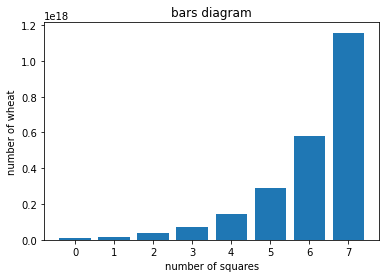

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

board_ndarray = expention_on_chessbord(8,8)
chessboard = board_ndarray.reshape(8,8) 

column_avarage = chessboard.mean(axis=0)

print(column_avarage)

plt.ylabel("number of wheat")
plt.xlabel("number of squares")
plt.title("bars diagram")
plt.bar(np.arange(8),column_avarage)
plt.show()

[Problème 4] Heatmap du nombre de blé

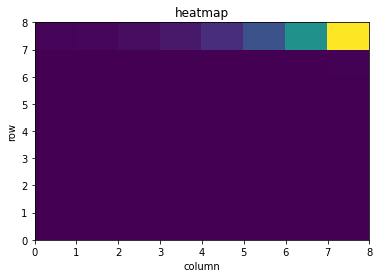

In [4]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard)
plt.show()

[Problème 5] Combien de fois est la seconde moitié de la première moitié?

In [5]:
chessboard_ndarray = expention_on_chessbord(8,8).reshape(2,32)

each_half_sum = chessboard_ndarray.sum(axis=1) # sum the lign of each half

nb_second_half_as_long_as_first_half = each_half_sum[1]//each_half_sum[0]

print("the second half has longer than first half {} time".format(nb_second_half_as_long_as_first_half))

the second half has longer than first half 4294967296.0 time


[Problème 6] Expansion à la masse n × m par une autre méthode de calcul

In [6]:
# with np.append()
def expention_on_chessbord(n,m):
    n_squares = n * m
    board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1]).astype(np.uint64)
        
    return board_ndarray

%time print("Arrange the wheat on a board：{}".format(expention_on_chessbord(8,8)[-1]))

Arrange the wheat on a board：9223372036854775808
CPU times: user 1.92 ms, sys: 2.05 ms, total: 3.97 ms
Wall time: 7.41 ms


In [7]:
# with broadcast

def expention_on_chessbord(n,m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    return board_ndarray

%time print("Arrange the wheat on a board：{}".format(expention_on_chessbord(8,8)[-1]))

Arrange the wheat on a board：9223372036854775808
CPU times: user 1.2 ms, sys: 0 ns, total: 1.2 ms
Wall time: 5.87 ms


[Problème 7] Comparaison des temps de calcul

In [11]:
%%timeit
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

The slowest run took 27.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.26 µs per loop
